In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns




In [2]:
Data = pd.read_csv("Advertising.csv")
Data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
Data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
Data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
Data.shape

(200, 5)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Understanding the Variableas

In [9]:
Data.columns
    

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
Data.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [11]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25/Q1' ,'P50/Q2' ,'P75/Q3' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [12]:
def var_summary(x):
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())
    
    for i in x:
        if i<lc or i>uc:
            count = 1
        else:
            count = 0
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max() , lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX','LC','UC','outlier_flag'])


In [13]:
Data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,...,P25,P50,P75,P90,P95,P99,MAX,LC,UC,outlier_flag
Unnamed: 0,200.0,0.0,20100.0,100.5000,100.50,57.879185,3350.000000,1.0,2.990,10.950,...,50.750,100.50,150.250,180.10,190.050,198.010,200.0,-15.258369,216.258369,0.0
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,...,74.375,149.75,218.825,261.44,280.735,292.907,296.4,-24.665973,318.750973,0.0
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,...,9.975,22.90,36.525,43.52,46.810,49.400,49.6,-6.429618,52.957618,0.0
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,...,12.750,25.75,45.100,59.07,71.825,89.515,114.0,-13.003242,74.111242,0.0
Sales,200.0,0.0,2804.5,14.0225,12.90,5.217457,27.221853,1.6,4.784,6.600,...,10.375,12.90,17.400,21.71,23.800,25.507,27.0,3.587587,24.457413,0.0


In [14]:
var_summary(Data.Newspaper)

N                200.000000
NMISS              0.000000
SUM             6110.800000
MEAN              30.554000
MEDIAN            25.750000
STD               21.778621
VAR              474.308326
MIN                0.300000
P1                 0.999000
P5                 3.600000
P10                5.990000
P25               12.750000
P50               25.750000
P75               45.100000
P90               59.070000
P95               71.825000
P99               89.515000
MAX              114.000000
LC               -13.003242
UC                74.111242
outlier_flag       0.000000
dtype: float64

Check Unique Values for each variable

In [15]:
for i in Data.columns.tolist():
  print("No. of unique values in",i,"is",Data[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


Data Wrangling

In [16]:
Data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
Data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Data Cleaning

In [18]:
Data["Newspaper"] = Data.Newspaper.clip(lower = 10  , upper = 100)

In [19]:
var_summary(Data.Newspaper)

N                200.000000
NMISS              0.000000
SUM             6267.100000
MEAN              31.335500
MEDIAN            25.750000
STD               20.537900
VAR              421.805316
MIN               10.000000
P1                10.000000
P5                10.000000
P10               10.000000
P25               12.750000
P50               25.750000
P75               45.100000
P90               59.070000
P95               71.825000
P99               89.506000
MAX              100.000000
LC                -9.740299
UC                72.411299
outlier_flag       0.000000
dtype: float64

In [20]:
Data['Sales'] = Data['Sales'].clip(lower = 10, upper = 100)

In [21]:
var_summary(Data.Sales)

N                200.000000
NMISS              0.000000
SUM             2905.000000
MEAN              14.525000
MEDIAN            12.900000
STD                4.580357
VAR               20.979673
MIN               10.000000
P1                10.000000
P5                10.000000
P10               10.000000
P25               10.375000
P50               12.900000
P75               17.400000
P90               21.710000
P95               23.800000
P99               25.507000
MAX               27.000000
LC                 5.364285
UC                23.685715
outlier_flag       0.000000
dtype: float64

Missing Values Treatment

In [22]:

Data['Sales']=Data['Sales'].fillna(Data['Sales'].mean())

Data Vizualization

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\astha\AppData\Local\Temp\ipykernel_9064\1412330660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Sales)


<Axes: xlabel='Sales', ylabel='Density'>

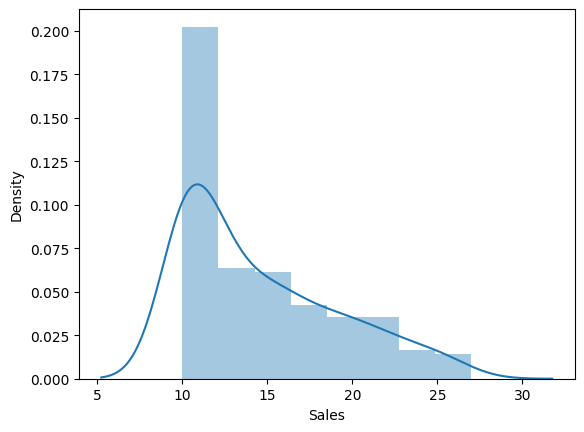

In [24]:
sns.distplot(Data.Sales) 

<Axes: >

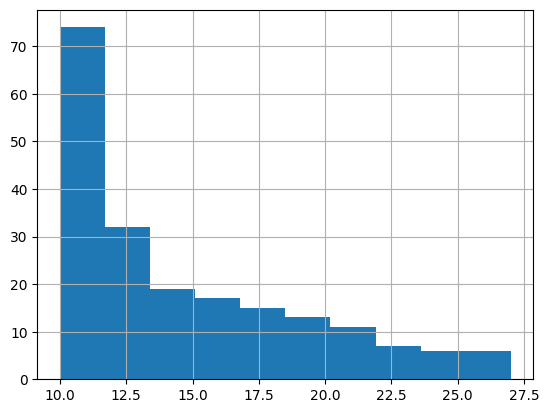

In [25]:
Data.Sales.hist()

C:\Users\astha\AppData\Local\Temp\ipykernel_9064\3776955669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( Data.Newspaper )


<Axes: xlabel='Newspaper', ylabel='Density'>

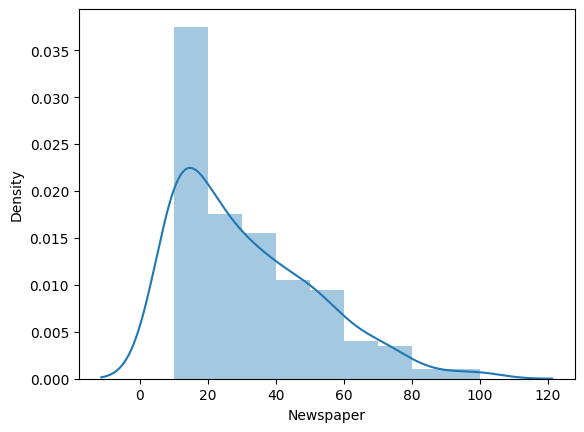

In [26]:
sns.distplot( Data.Newspaper )

<Axes: >

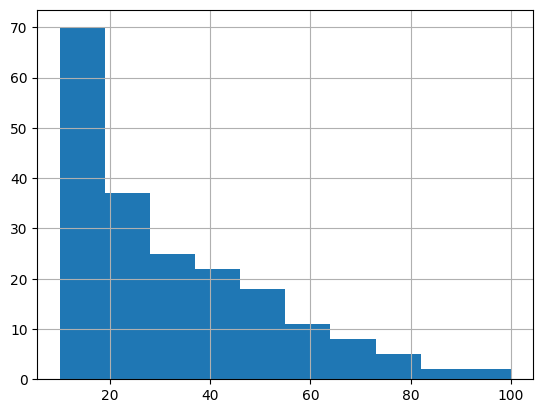

In [27]:
Data.Newspaper.hist()

C:\Users\astha\AppData\Local\Temp\ipykernel_9064\4008822381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Radio)


<Axes: xlabel='Radio', ylabel='Density'>

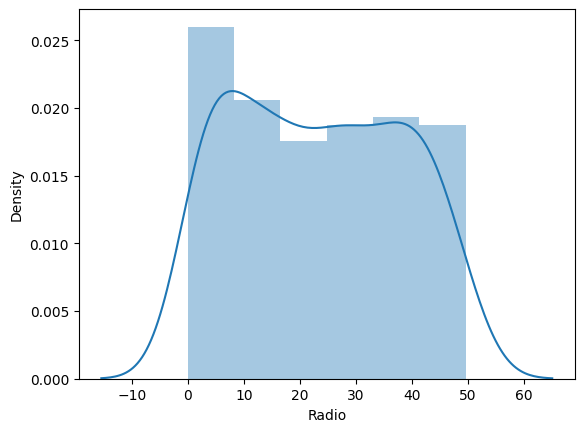

In [28]:
sns.distplot(Data.Radio)

C:\Users\astha\AppData\Local\Temp\ipykernel_9064\1829267997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( Data.TV)


<Axes: xlabel='TV', ylabel='Density'>

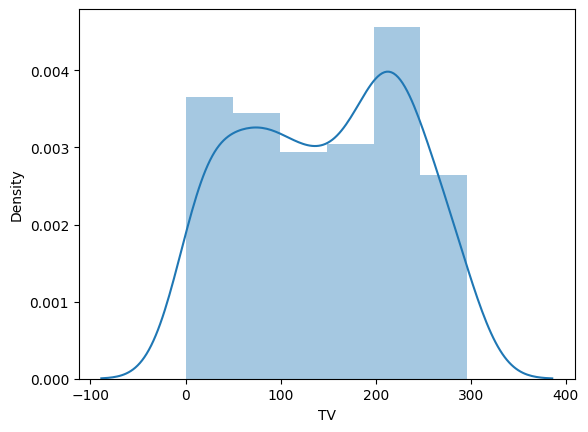

In [29]:
sns.distplot( Data.TV)

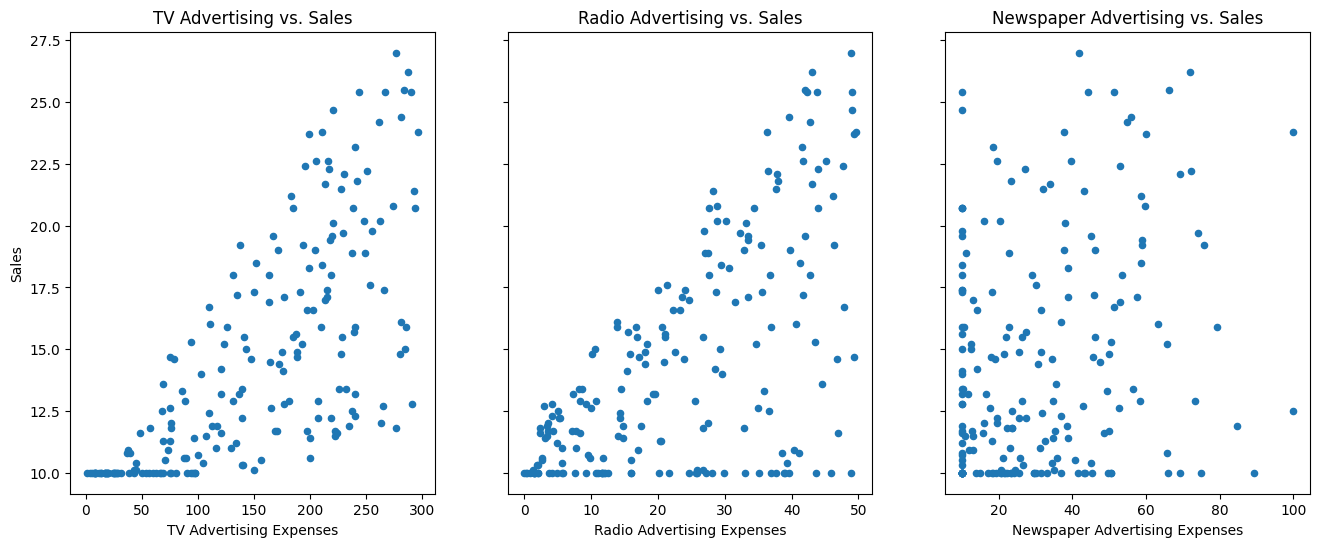

In [30]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
Data.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
Data.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
Data.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

plt.show()

Correlation Heatmap

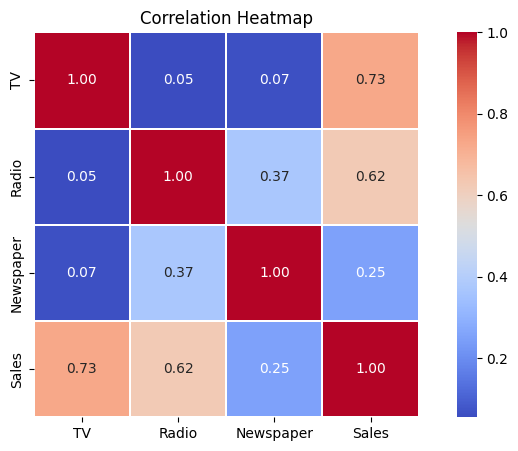

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

plt.title("Correlation Heatmap")

plt.show()
     

Pair Plot

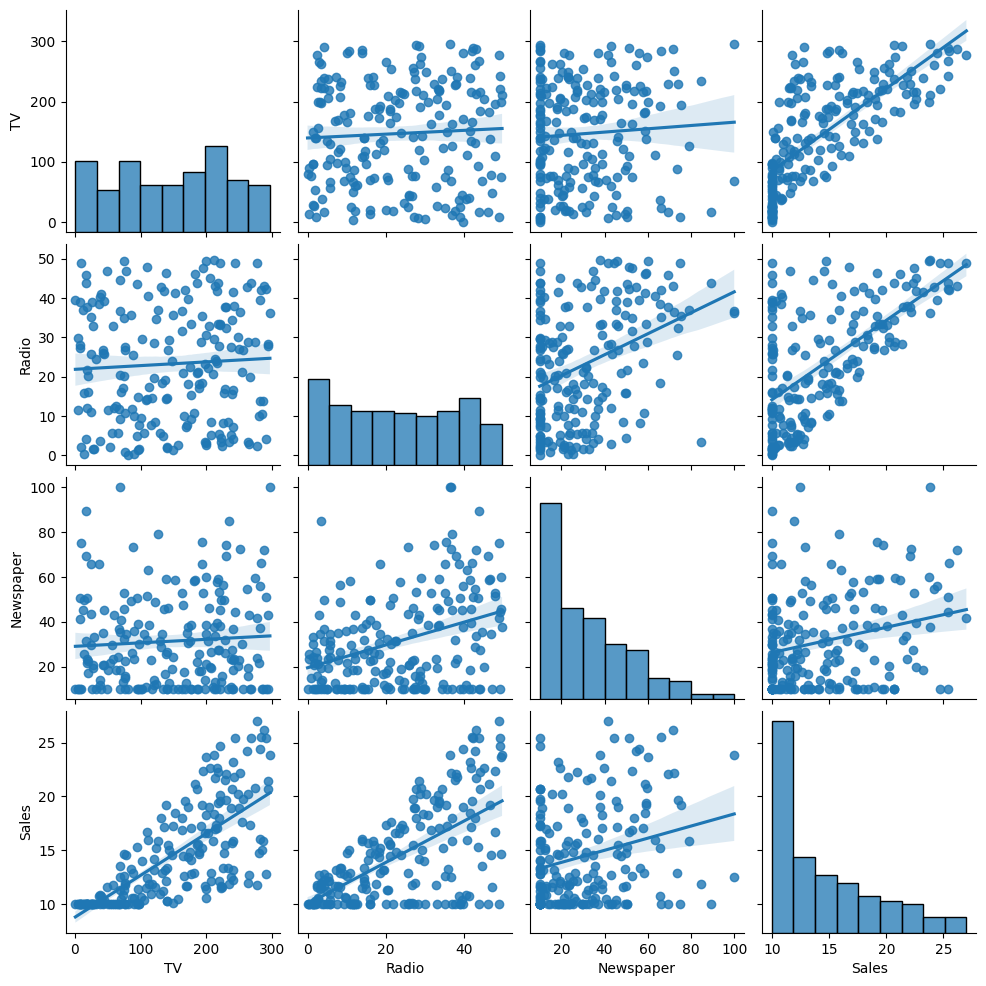

In [32]:
sns.pairplot(Data,kind="reg");

plt.show()

Feature  & Data Pre-processing

In [33]:
# Removing the outlier from newspaper
Data=Data[Data['Newspaper']<=90]

In [34]:
# Select the features wisely to avoid overfitting
features = [i for i in Data.columns if i not in ['Sales']]
features
     

['TV', 'Radio', 'Newspaper']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [37]:
continuous_feature_Data = pd.DataFrame(Data[continuous_variables])

In [38]:
continuous_feature_Data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,10.0
197,177.0,9.3,10.0
198,283.6,42.0,66.2


In [39]:
calc_vif(Data[[i for i in continuous_feature_Data]])

,variables,VIF
0,TV,2.560518
1,Radio,3.398491
2,Newspaper,3.438430


In [40]:
Data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,10.0
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Building Regression Model

In [41]:

import statsmodels.formula.api as smf

import pandas as pd


In [42]:
lm = smf.ols('Sales ~ TV + Radio + Newspaper', Data).fit()

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     436.4
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           5.82e-86
Time:                        19:28:28   Log-Likelihood:                -377.89
No. Observations:                 198   AIC:                             763.8
Df Residuals:                     194   BIC:                             776.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9397      0.314     15.730      0.000       4.320       5.559
TV             0.0370      0.001     26.830      0.000       0.034       0.040
Radio          0.1820      0.008     21.462      0.000       0.165       0.199
Newspaper     -0.0027      0.006     -0.414      0.680      -0.015       0.010
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.255
Skew:                           0.050   Prob(JB):                        0.881
Kurtosis:                       3.144   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm = smf.ols('Sales ~ TV + Radio', Data ).fit() 

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     657.3
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.19e-87
Time:                        19:28:29   Log-Likelihood:                -377.98
No. Observations:                 198   AIC:                             762.0
Df Residuals:                     195   BIC:                             771.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8900      0.289     16.893      0.000       4.319       5.461
TV             0.0369      0.001     26.892      0.000       0.034       0.040
Radio          0.1807      0.008     22.888      0.000       0.165       0.196
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.238
Skew:                           0.038   Prob(JB):                        0.888
Kurtosis:                       3.152   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lm.params

Intercept    4.889962
TV           0.036935
Radio        0.180732
dtype: float64

In [47]:
lm.conf_int()

,0,1
Intercept,4.319074,5.460851
TV,0.034226,0.039644
Radio,0.165159,0.196305


In [48]:
from sklearn import metrics

In [49]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_log_loss_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_s

Evaluating Model Accuracy

In [50]:
lm.rsquared

np.float64(0.8708245110844713)

In [51]:
round(  float (lm.rsquared) , 2)

0.87

In [52]:
ltmpredic = lm.predict(Data)

In [53]:
ltmpredic[1:10]

1    13.636350
2    13.820857
3    17.949861
4    13.519722
5    14.049106
6    12.941745
7    12.871904
8     5.587141
9    12.739482
dtype: float64

In [54]:
print( dir ( metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_log_loss_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_s

Calculating mean square error ... RMSE

In [55]:
mse =  metrics.mean_squared_error( Data.Sales, ltmpredic) 

In [56]:
rmse = np.sqrt ( mse)

In [57]:
rmse

np.float64(1.6324138708632279)

In [58]:
lm.resid[1:10]

1   -3.236350
2   -3.820857
3    0.550139
4   -0.619722
5   -4.049106
6   -1.141745
7    0.328096
8    4.412859
9   -2.139482
dtype: float64